Harris corner detection algorithm

cv2.cornerHaris(input image , block size , k size , k)

image = greyscale and should be of size float 32

block size = size of neighbourhood considered for corner detection

k size =  aperture parameter , of sober derivative used

k = harris detector free parameter in the equation

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

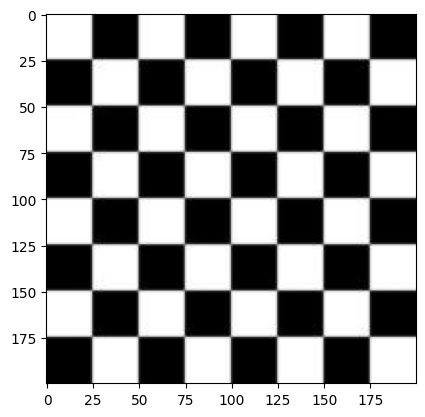

In [15]:
image = cv2.imread('E:/python/Images for opencv/chess.jpg')
gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
plt.imshow(image)

In [16]:
harris_corners = cv2.cornerHarris(gray , 3 , 3 , 0.05)

# we use dilation of the corners to enlarge them
kernel = np.ones((7 ,7) , np.uint8)
harris_corners = cv2.dilate(harris_corners , kernel , iterations = 1)

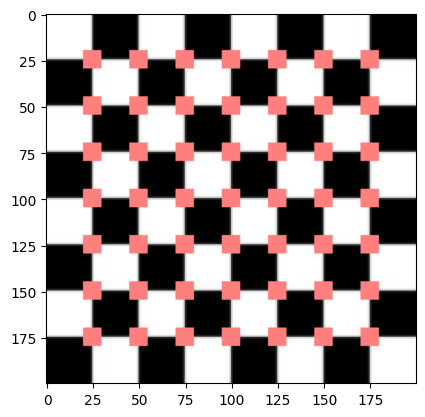

In [17]:
# threshold for an optimal value
image[harris_corners > 0.025 * harris_corners.max()] = [255 , 127 , 127]

plt.imshow(image)

improved corner detection using - good features to track

cv2.goodFeaturesToTrack(input image , max corners , quality level , min distance)

input image = 8 bit or floating point 32 bit ,  single channel image

max corners = max number of corners to return ,  if there are more corners than are found , the strongest of them is returned

quality level = parameters characterizing the minimal accepted qualityof image corners ,  the parameter value is multiplied by the best corner quality measure (smallest eigen value). the corners with the quality measure less than the product are rejected , ex: if the best corner as quality  measure 1500 , quality level = 0.01 , then all the corners with quality measure less than 15 are rejected

min distance = min possible distance between the returned corners

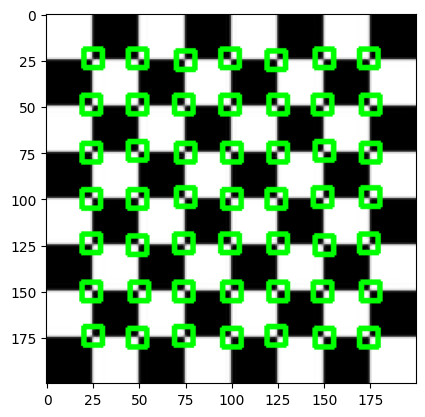

In [23]:
image2 = cv2.imread('E:/python/Images for opencv/chess.jpg')
gray2 = cv2.cvtColor(image2 , cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray2 , 50 , 0.01 , 15)

for corner in corners:
    x , y = corner[0]
    x = int (x)
    y = int (y)
    cv2.rectangle(image2 , (x-5 , y-5) , (x+5 , y +5) , (0 , 255 , 0) , 2)

plt.imshow(image2)

Problem with corners as features   : =>  large increse in brightness and scaling